# Aim

To verify Stefan's law of radiation by electrical method.


In [47]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# load datafile
df=pd.read_excel('C:/Users/ambik/OneDrive/Desktop/Stefan_law.xlsx')

In [49]:
# check top 5 records of the data file
df.head()

,V,I
0,1.8,0.0525
1,2.2,0.0600
2,2.6,0.0625
3,3.0,0.0700
4,3.4,0.0725


In [50]:
# check datatypes of the columns
df.dtypes

V    float64
I    float64
dtype: object

In [51]:
# add power (P=V*I) column to dataframe
df['P']=df['V']*df['I']

In [52]:
#check column is added
df.head()

,V,I,P
0,1.8,0.0525,0.0945
1,2.2,0.0600,0.1320
2,2.6,0.0625,0.1625
3,3.0,0.0700,0.2100
4,3.4,0.0725,0.2465


In [53]:
# add Resistance (R=V/I) column to data and check the datafile
df['R']=df['V']/df['I']
df

,V,I,P,R
0,1.8,0.0525,0.09450,34.285714
1,2.2,0.0600,0.13200,36.666667
2,2.6,0.0625,0.16250,41.600000
3,3.0,0.0700,0.21000,42.857143
4,3.4,0.0725,0.24650,46.896552
5,3.8,0.0775,0.29450,49.032258
6,4.2,0.0823,0.34566,51.032807
7,4.6,0.0875,0.40250,52.571429
8,5.0,0.0900,0.45000,55.555556
9,5.4,0.0950,0.51300,56.842105


In [54]:
# import math library to calculate log values of power and resistance and add new columns log P and log R
import math
from math import log
df['log P']=df['P'].apply(lambda x: float(math.log(x)))
df['log R']=df['R'].apply(lambda x: float(math.log(x)))

In [55]:
# again check the data
df

,V,I,P,R,log P,log R
0,1.8,0.0525,0.09450,34.285714,-2.359155,3.534729
1,2.2,0.0600,0.13200,36.666667,-2.024953,3.601868
2,2.6,0.0625,0.16250,41.600000,-1.817077,3.728100
3,3.0,0.0700,0.21000,42.857143,-1.560648,3.757872
4,3.4,0.0725,0.24650,46.896552,-1.400393,3.847944
5,3.8,0.0775,0.29450,49.032258,-1.222476,3.892478
6,4.2,0.0823,0.34566,51.032807,-1.062300,3.932469
7,4.6,0.0875,0.40250,52.571429,-0.910060,3.962173
8,5.0,0.0900,0.45000,55.555556,-0.798508,4.017384
9,5.4,0.0950,0.51300,56.842105,-0.667479,4.040277


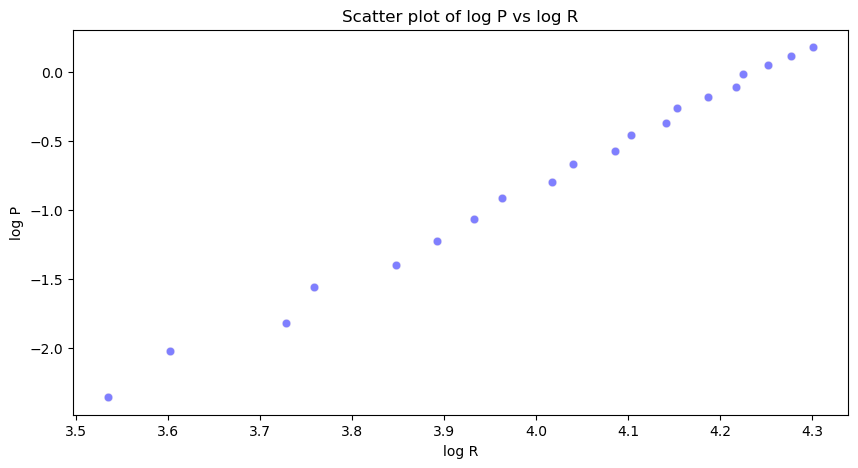

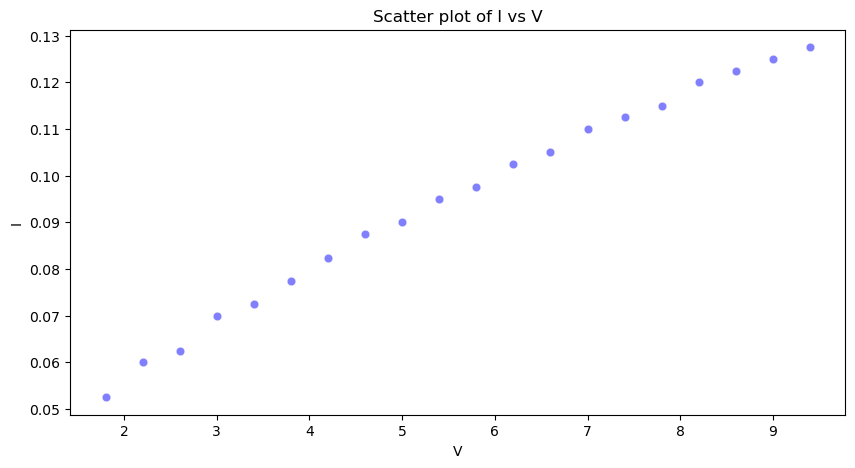

In [56]:
# Scatter plot of log R and log R features
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='log R',y='log P',color='blue',edgecolor='linen',alpha=0.5)
plt.title("Scatter plot of log P vs log R")
plt.xlabel('log R')
plt.ylabel('log P')
plt.show()

# Scatter plot of I and V features
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='V',y='I',color='blue',edgecolor='linen',alpha=0.5)
plt.title("Scatter plot of I vs V")
plt.xlabel('V')
plt.ylabel('I')
plt.show()

In [57]:
# Choose columns as X and y
X=df.iloc[:,-1].values
y=df.iloc[:,-2].values

In [58]:
# As we have only 1 feature, so reshape X column
X=X.reshape(-1,1)
X.shape

(20, 1)

In [59]:
# check the shape of y
y.shape

(20,)

In [60]:
# divide the data to test and training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y, train_size=0.66, random_state=20) # random_state gives constant information

In [61]:
# apply linear Regressiong model
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

In [62]:
#To retrieve the intercept:
print(model.intercept_)

#For retrieving the slope:
print(model.coef_)

-14.218177655063737
[3.34873763]


In [63]:
# predict the values
y_predict=model.predict(x_test)

In [64]:
from sklearn.metrics import r2_score

In [65]:
# find r-squared (how well the data fit the regression model)
r2_score(y_test, y_predict)

0.9919535674863179

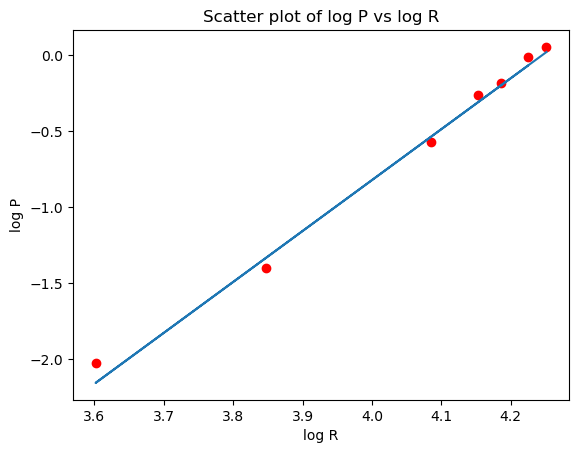

In [66]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_predict)
plt.title("Scatter plot of log P vs log R")
plt.xlabel('log R')
plt.ylabel('log P')
plt.show()

In [67]:
train_predict=model.predict(x_train)

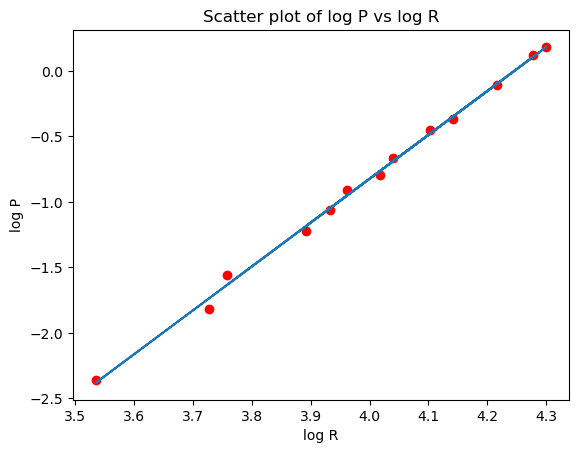

In [68]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,train_predict)
plt.title("Scatter plot of log P vs log R")
plt.xlabel('log R')
plt.ylabel('log P')
plt.show()

Conclusion: The curve between Log P and log R shows a linear relation between the data. The slope of the best fit line is 3.3487 which is close to 4 with r2 score 99.19 %. Hence, the result is verified. 
